In [1]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from preprocess_data import confusion_matrix_preprocessed

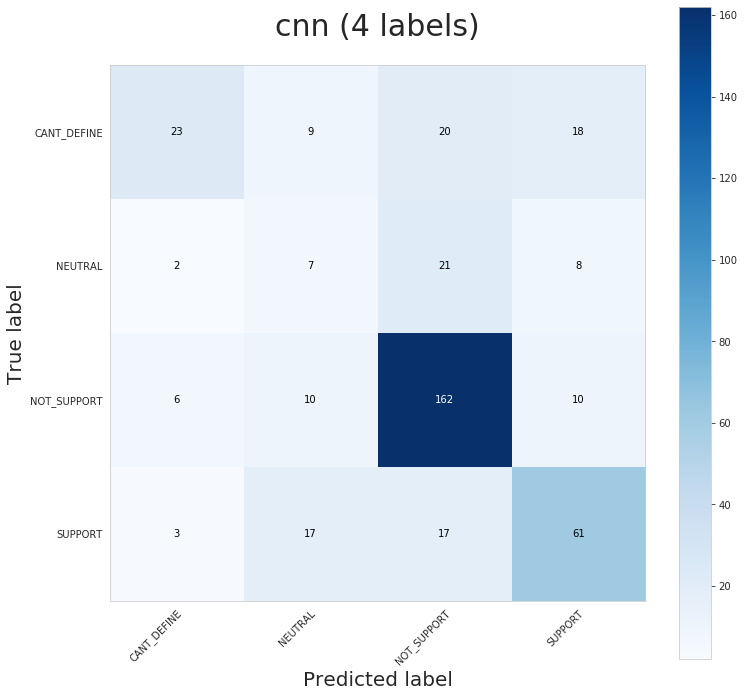

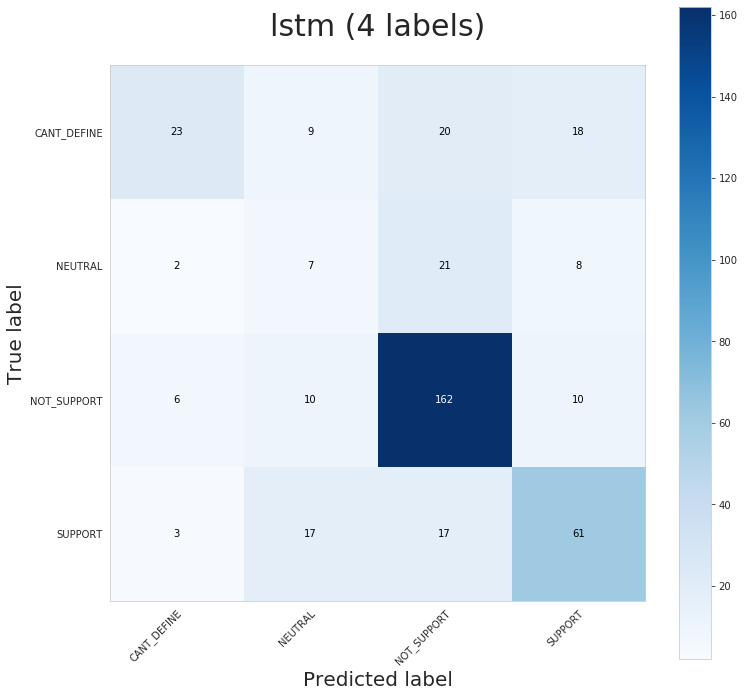

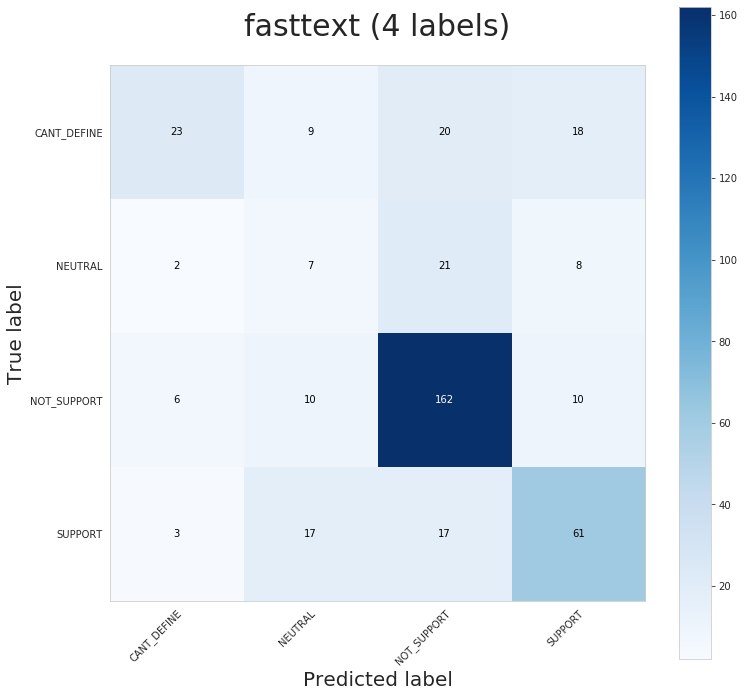

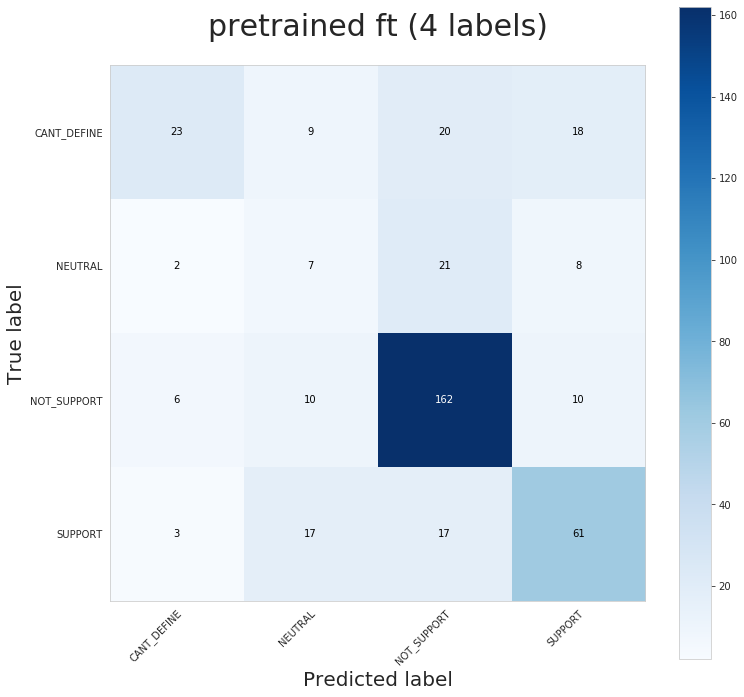

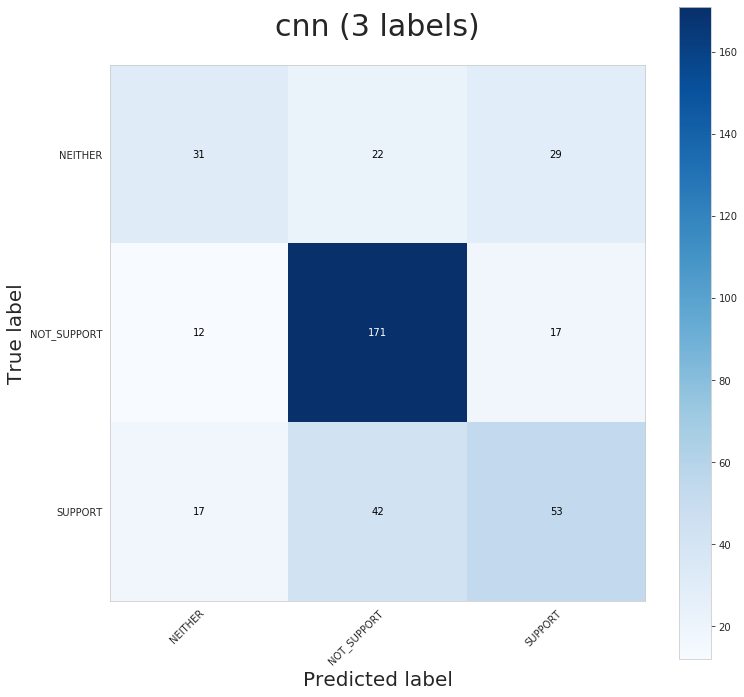

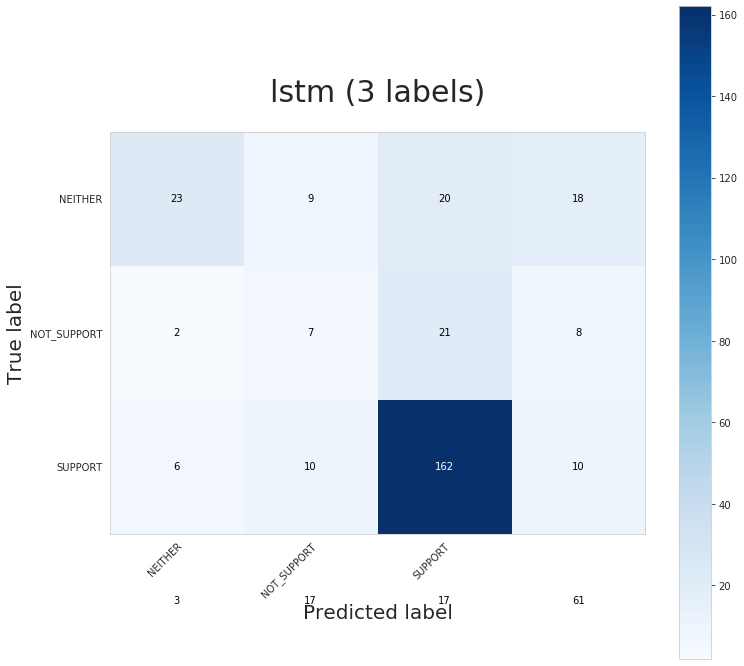

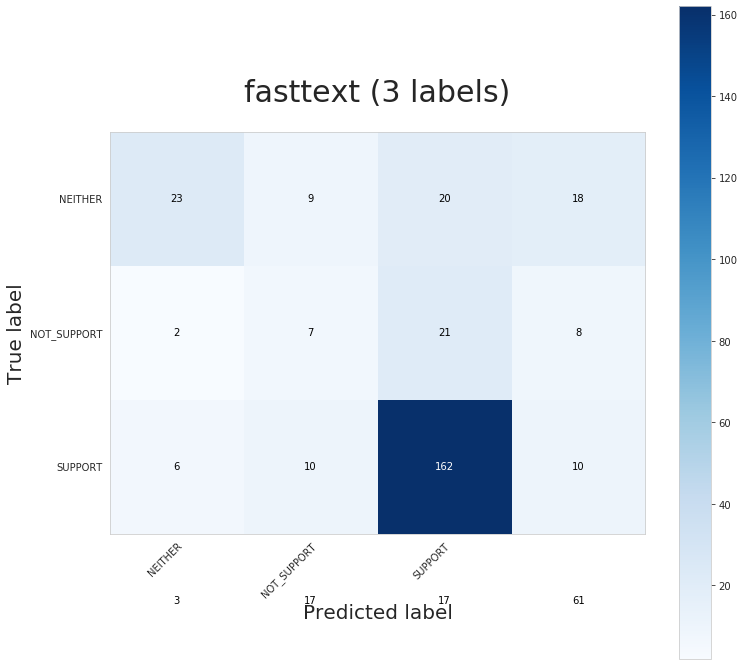

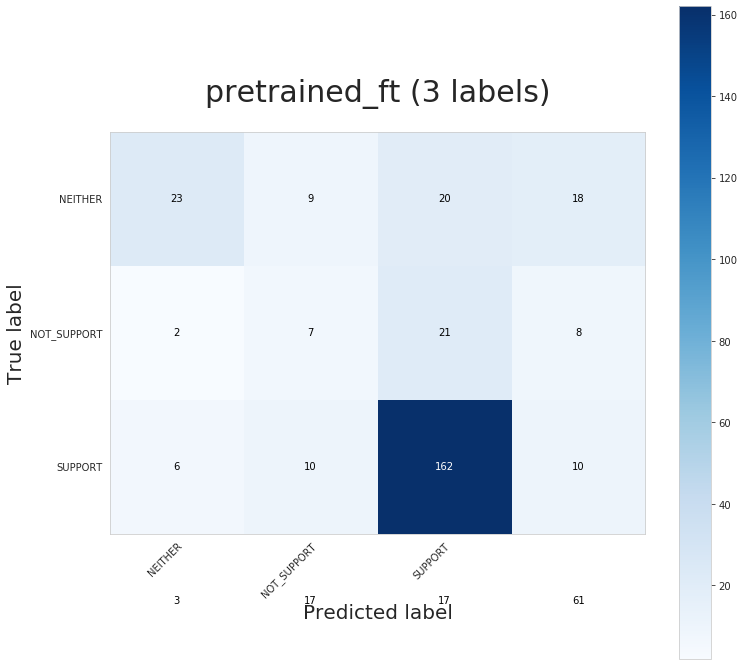

In [2]:
LABELS_4=['CANT_DEFINE','NEUTRAL','NOT_SUPPORT','SUPPORT']
LABELS_3=['NEITHER','NOT_SUPPORT','SUPPORT']

models_data = confusion_matrix_preprocessed()

def visualize_confusion_matrix(y_true, y_pred, classes, title=None):

    sns.set_style("whitegrid", {'axes.grid' : False})
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    #setting labels
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes)
    ax.set_title(title,fontsize= 30, pad=30)
    ax.set_ylabel('True label',fontsize= 20)
    ax.set_xlabel('Predicted label',fontsize= 20)

    # label rotation
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # text annotations
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #bug workarond
    ax.set_ylim(len(classes)-0.5, -0.5)
    return ax

for data in models_data:
    y_test=data[0].iloc[:,0]
    predicted=data[0].iloc[:,1]
    title=data[1]
    label_count=data[2]
    labels=LABELS_4 if label_count == 4 else LABELS_3
    visualize_confusion_matrix(y_test, predicted, classes=labels, title=title)